In [2]:
import pandas as pd
from numpy import NaN

In [3]:
path_to_Databases = "C:/Users/andre/OneDrive/Escritorio/Universidad/DM/codigoProyecto/"
title_complete_csv = path_to_Databases+"title_complete_csv.csv" 
title_complete = pd.read_csv(title_complete_csv)

In [138]:
path_to_Databases = "C:/Users/andre/OneDrive/Escritorio/Universidad/DM/codigoProyecto/"
principals_complete_csv = path_to_Databases+"principals_complete_csv.csv" 
principals_complete = pd.read_csv(principals_complete_csv)

In [7]:
title_complete

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000009,Miss Jerry,1894,45.0,Romance,5.3,205
1,tt0000147,The Corbett-Fitzsimmons Fight,1897,100.0,"Documentary,News,Sport",5.3,480
2,tt0000502,Bohemios,1905,100.0,nan,4.1,15
3,tt0000574,The Story of the Kelly Gang,1906,70.0,"Action,Adventure,Biography",6.0,843
4,tt0000591,The Prodigal Son,1907,90.0,Drama,4.4,20
...,...,...,...,...,...,...,...
346786,tt9916362,Coven,2020,92.0,"Drama,History",6.4,5486
346787,tt9916428,The Secret of China,2019,NaN,"Adventure,History,War",3.6,16
346788,tt9916460,Pink Taxi,2019,NaN,Comedy,9.4,18
346789,tt9916538,Kuambil Lagi Hatiku,2019,123.0,Drama,8.6,7


In [6]:
principals_complete

NameError: name 'principals_complete' is not defined

In [8]:
count = 0
conjunto_Generos = set()
for i in range(len(title_complete['genres'])):
    generos = title_complete['genres'][i]
    generos = generos.split(",")
    for genero in generos:
        conjunto_Generos.add(genero)
print(len(conjunto_Generos))
print(conjunto_Generos) 

28
{'Thriller', 'Reality-TV', 'Biography', 'War', 'News', 'Action', 'nan', 'Animation', 'Music', 'Family', 'Adult', 'History', 'Sci-Fi', 'Adventure', 'Comedy', 'Film-Noir', 'Talk-Show', 'Western', 'Mystery', 'Romance', 'Horror', 'Crime', 'Fantasy', 'Documentary', 'Musical', 'Game-Show', 'Sport', 'Drama'}


In [170]:
title_complete

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000009,Miss Jerry,1894,45.0,Romance,5.3,205
1,tt0000147,The Corbett-Fitzsimmons Fight,1897,100.0,"Documentary,News,Sport",5.3,480
2,tt0000502,Bohemios,1905,100.0,NaN,4.1,15
3,tt0000574,The Story of the Kelly Gang,1906,70.0,"Action,Adventure,Biography",6.0,843
4,tt0000591,The Prodigal Son,1907,90.0,Drama,4.4,20
...,...,...,...,...,...,...,...
346786,tt9916362,Coven,2020,92.0,"Drama,History",6.4,5486
346787,tt9916428,The Secret of China,2019,NaN,"Adventure,History,War",3.6,16
346788,tt9916460,Pink Taxi,2019,NaN,Comedy,9.4,18
346789,tt9916538,Kuambil Lagi Hatiku,2019,123.0,Drama,8.6,7


In [176]:
print(title_complete.dtypes)

tconst             object
primaryTitle       object
startYear          object
runtimeMinutes    float64
genres             object
averageRating     float64
numVotes            int64
dtype: object


In [5]:
#correccion de tipo de datos
title_complete['tconst'] = title_complete['tconst'].astype(str)
title_complete['genres'].replace('\\N',NaN,inplace=True)
title_complete['genres'] = title_complete['genres'].astype(str)
title_complete['runtimeMinutes'] = pd.to_numeric(title_complete['runtimeMinutes'],errors='coerce', downcast='integer')

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#normalizacion de dato
def normalizacionMinMax(column):
    min_val = column.min()
    max_val = column.max()
    normalized_column = (column - min_val) / (max_val - min_val)
    return normalized_column
title_complete['runtimeMinutes'] = normalizacionMinMax(title_complete['runtimeMinutes'])
title_complete['averageRating'] = normalizacionMinMax(title_complete['averageRating'])
title_complete['numVotes'] = normalizacionMinMax(title_complete['numVotes'])

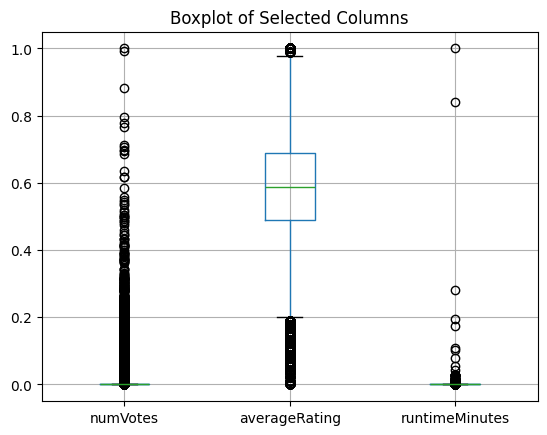

In [116]:
#creacion de diagrama de cajas para deteccion de autlayers 
title_complete[['numVotes','averageRating','runtimeMinutes']].boxplot()
# Add a title
plt.title('Boxplot of Selected Columns')
# Show the plot
plt.show()


In [185]:


#Nuevas columnas para categoria
title_complete['category 1'] = NaN
title_complete['category 2'] = NaN
title_complete['category 3'] = NaN

In [186]:
#Vamos a ver cuantos generos tenemos en total,así cómo volverlos numericos en base a su posición en la lista y ordenarlos para facilitar la visualización
title_complete['genres'].replace('',)
count = 0
conjunto_Generos = set()
listas_generos = []
for i in range(len(title_complete['genres'])):
    generos = title_complete['genres'].iloc[i]
    generos = generos.split(",")
    listas_generos.append(generos)
    for genero in generos:
        conjunto_Generos.add(genero)

listaGeneros = list(conjunto_Generos)
# Remplazar listas de géneros individuales por sus posiciones en la lista global
for generos in listas_generos:
    for i in range(len(generos)):
        genero = generos[i]
        generos[i] = listaGeneros.index(genero)


for generos in listas_generos:
    generos.sort()


#Probablemente faltan categorias por la muestra
print(len(conjunto_Generos))
print(conjunto_Generos)
print(listas_generos)

C:\Users\andre\AppData\Local\Temp\ipykernel_22212\638684174.py:2: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  title_complete['genres'].replace('',)


28
{'Animation', 'Sci-Fi', 'Action', 'Comedy', 'Documentary', 'Sport', 'Biography', 'Family', 'Talk-Show', 'Music', 'Musical', 'Adventure', 'Western', 'Reality-TV', 'Mystery', 'Game-Show', 'Drama', 'Film-Noir', 'nan', 'Horror', 'Crime', 'News', 'Fantasy', 'Adult', 'War', 'Thriller', 'History', 'Romance'}
[[27], [4, 5, 21], [18], [2, 6, 11], [16], [16], [16], [16], [11, 22], [18], [16], [16], [18], [3], [18], [16, 24], [18], [16], [18], [20], [18], [18], [18], [16, 27], [11, 16], [18], [16], [16], [6, 7, 16], [16], [18], [18], [18], [16, 26], [18], [18], [16, 26], [16, 27], [24], [16], [18], [18], [16], [16], [18], [18], [18], [18], [16], [18], [16], [18], [16], [6, 16, 26], [16], [1], [16], [16], [16, 27], [18], [18], [16, 26], [11, 16, 22], [16], [16], [6, 16], [18], [18], [4, 24], [18], [18], [16], [16], [6, 16, 27], [18], [16, 26], [24, 26], [16], [3], [16], [16], [18], [16, 27], [18], [2, 16, 25], [20, 25], [18], [11], [16, 25], [12], [16], [16], [16, 24], [18], [16, 26], [18], [18

In [190]:

print(title_complete[['tconst','category 1','category 2','category 3']])

           tconst  category 1  category 2  category 3
0       tt0000009        28.0         0.0         0.0
1       tt0000147         5.0         6.0        22.0
2       tt0000502        19.0         0.0         0.0
3       tt0000574         3.0         7.0        12.0
4       tt0000591        17.0         0.0         0.0
...           ...         ...         ...         ...
346786  tt9916362        17.0        27.0         0.0
346787  tt9916428        12.0        25.0        27.0
346788  tt9916460         4.0         0.0         0.0
346789  tt9916538        17.0         0.0         0.0
346790  tt9916730        17.0         0.0         0.0

[346791 rows x 4 columns]


In [ ]:
#Ingreamos nuestras categorias numericas cómo dato individual para las nuevas columnas
for i in range(len(title_complete)):

    for j in range(len(listas_generos[i])):
        title_complete['category ' + str(j+1)].iloc[i] = listas_generos[i][j]+1

#Rellenamos los espacios vacios con -1 = no hay categoria / no hay más categorias
title_complete[['category 1','category 2','category 3']] = title_complete[['category 1','category 2','category 3']].fillna(0)

           tconst  category 1  category 2  category 3
0       tt0000009        28.0         0.0         0.0
1       tt0000147         5.0         6.0        22.0
2       tt0000502        19.0         0.0         0.0
3       tt0000574         3.0         7.0        12.0
4       tt0000591        17.0         0.0         0.0
...           ...         ...         ...         ...
346786  tt9916362        17.0        27.0         0.0
346787  tt9916428        12.0        25.0        27.0
346788  tt9916460         4.0         0.0         0.0
346789  tt9916538        17.0         0.0         0.0
346790  tt9916730        17.0         0.0         0.0

[346791 rows x 4 columns]
